# EDA ADReSS Dataset

By: Jimuel Celeste, Jr. 

Objective: Explore what's in the ADReSS Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Training

In [4]:
cc = '/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/data/From ADReSS 2020 Challenge/ADReSS-IS2020-data/train/cc_meta_data.txt'
cc = pd.read_csv(cc, sep=';')
cc.head()

,ID,age,gender,mmse
0,S001,74,male,NA
1,S002,62,female,30
2,S003,69,female,29
3,S004,71,female,30
4,S005,74,female,30


(array([ 1.,  0.,  3.,  0.,  0.,  8.,  0., 18.,  0., 23.]),
 array([26. , 26.4, 26.8, 27.2, 27.6, 28. , 28.4, 28.8, 29.2, 29.6, 30. ]),
 <BarContainer object of 10 artists>)

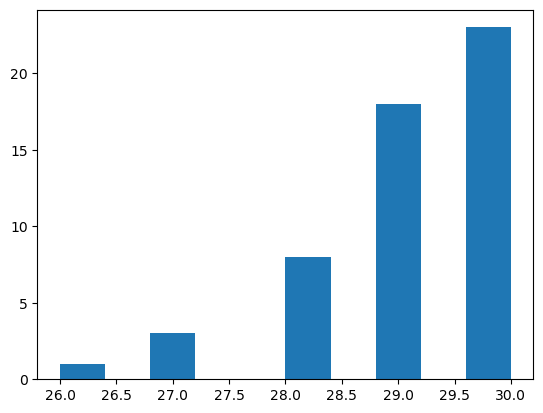

In [68]:
plt.hist(cc['mmse'])

In [18]:
cd = '/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/data/From ADReSS 2020 Challenge/ADReSS-IS2020-data/train/cd_meta_data.txt'
cd = pd.read_csv(cd, sep=';')
cd.head()

,ID,age,gender,mmse
0,S079,59,male,11
1,S080,55,male,19
2,S081,69,male,19
3,S082,66,male,11
4,S083,52,male,30


(array([ 1.,  0.,  2.,  7., 10., 14.,  9.,  6.,  4.,  1.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

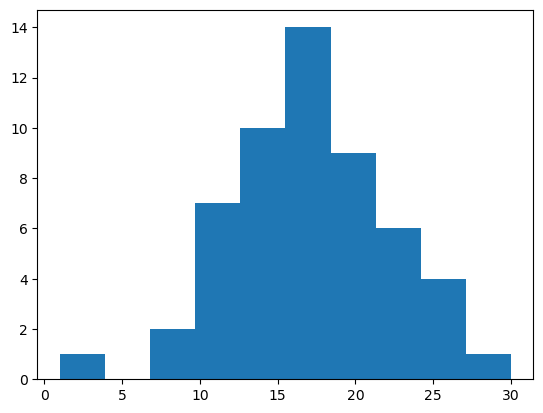

In [69]:
plt.hist(cd['mmse'])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 49.],
        [ 1.,  0.,  2.,  7., 10., 14.,  9.,  6.,  4.,  1.]]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 2 BarContainer objects>)

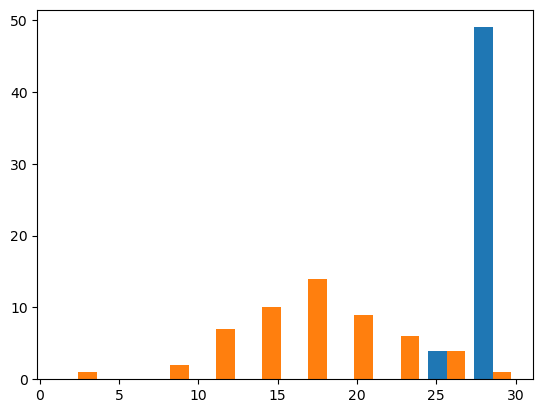

In [66]:
plt.hist([cc['mmse'], cd['mmse']])

(array([ 1.,  0.,  2.,  7., 10., 14.,  9.,  6.,  4.,  1.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

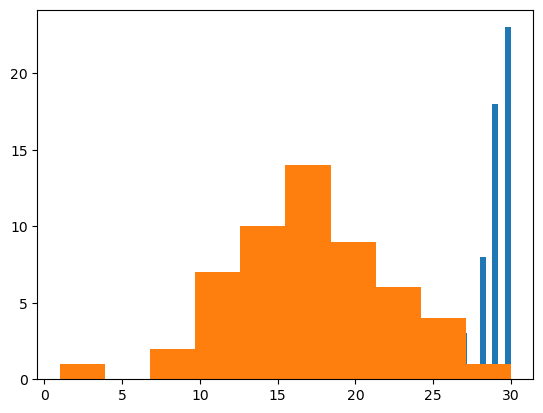

In [67]:
plt.hist(cc['mmse'], label='cc')
plt.hist(cd['mmse'], label='cd')

This makes sense because CC contains "control" and CD contains "dementia".

In [36]:
cc['mmse'] = cc['mmse'].apply(lambda x: int(x.strip()) if x.strip() != 'NA' else None)

In [38]:
training = pd.concat([cc, cd])
training.head()

,ID,age,gender,mmse
0,S001,74,male,NaN
1,S002,62,female,30.0
2,S003,69,female,29.0
3,S004,71,female,30.0
4,S005,74,female,30.0


(array([ 1.,  0.,  2.,  7., 10., 14.,  9.,  6.,  8., 50.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

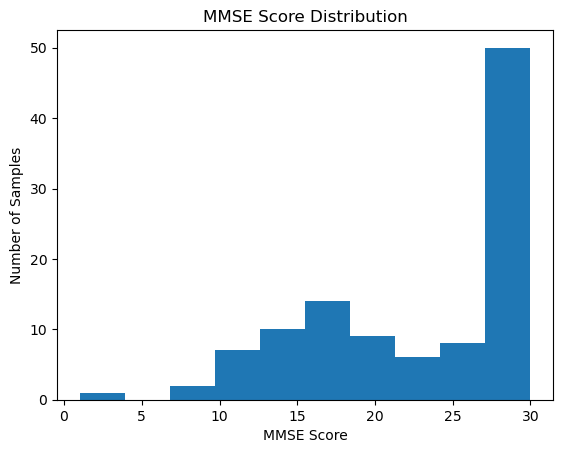

In [43]:
plt.title("MMSE Score Distribution")
plt.xlabel("MMSE Score")
plt.ylabel("Number of Samples")
plt.hist(training['mmse'], label='training')

In [57]:
cc['mmse'].describe()

count    53.000000
mean     29.113208
std       0.993447
min      26.000000
25%      29.000000
50%      29.000000
75%      30.000000
max      30.000000
Name: mmse, dtype: float64

In [58]:
cd['mmse'].describe()

count    54.000000
mean     17.055556
std       5.464868
min       1.000000
25%      13.250000
50%      17.000000
75%      19.750000
max      30.000000
Name: mmse, dtype: float64

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_79507/1952847855.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cc['mmse'], cd['mmse']], labels=['cc', 'cd'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1445c8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1445d2430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1445c8c10>,
 'medians': [<matplotlib.lines.Line2D at 0x1445d2970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1445d2c10>,
 'means': []}

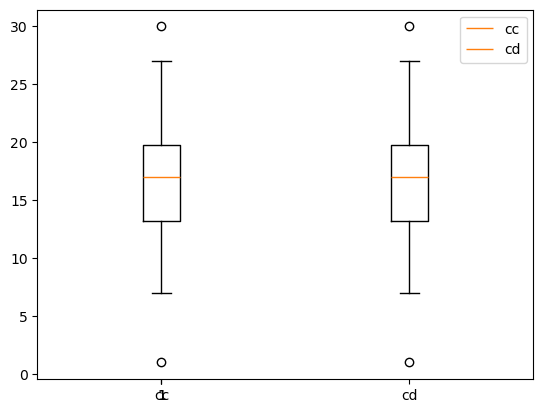

In [61]:
plt.boxplot(cc['mmse'], label='cc')
plt.boxplot(cd['mmse'], label='cd')
plt.legend()
plt.boxplot([cc['mmse'], cd['mmse']], labels=['cc', 'cd'])

In [49]:
for column in training.columns: 
    training = training.rename(columns={column: column.strip()})

(array([48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

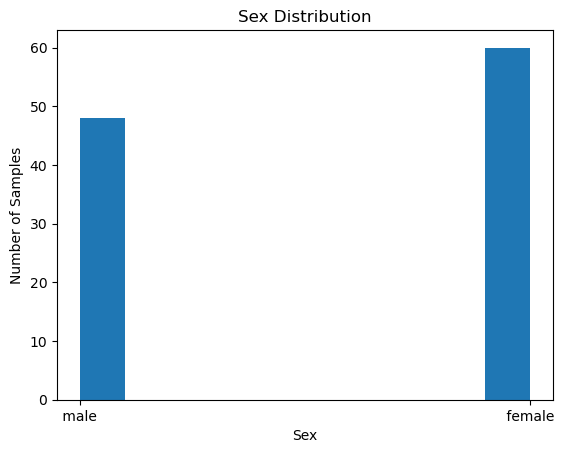

In [50]:
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Number of Samples")
plt.hist(training['gender'], label='training')

In [71]:
for column in cc.columns: 
    cc = cc.rename(columns={column: column.strip()})

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

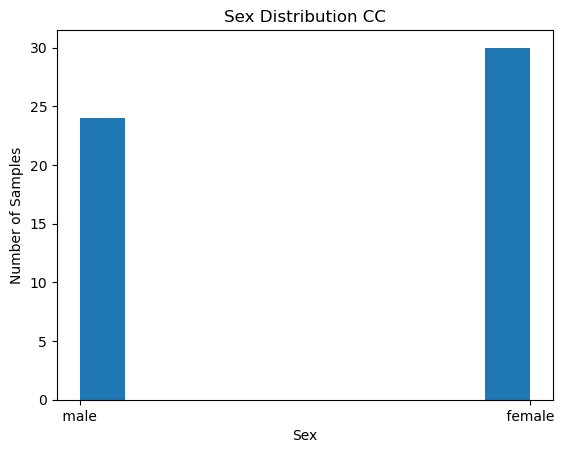

In [72]:
plt.title("Sex Distribution CC")
plt.xlabel("Sex")
plt.ylabel("Number of Samples")
plt.hist(cc['gender'], label='training')

In [73]:
for column in cd.columns: 
    cd = cd.rename(columns={column: column.strip()})

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

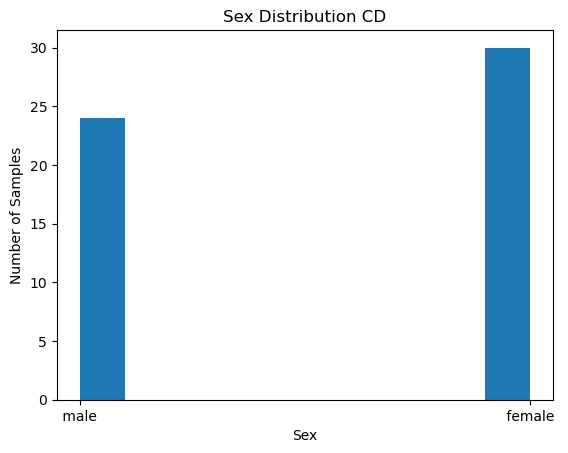

In [74]:
plt.title("Sex Distribution CD")
plt.xlabel("Sex")
plt.ylabel("Number of Samples")
plt.hist(cd['gender'], label='training')

(array([1., 4., 6., 4., 9., 8., 5., 8., 4., 5.]),
 array([52. , 54.7, 57.4, 60.1, 62.8, 65.5, 68.2, 70.9, 73.6, 76.3, 79. ]),
 <BarContainer object of 10 artists>)

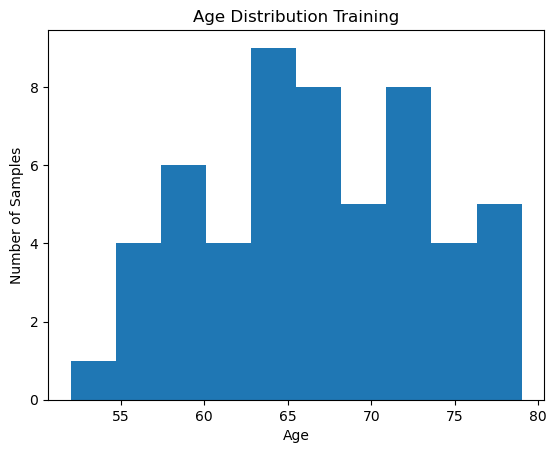

In [75]:
plt.title("Age Distribution Training")
plt.xlabel("Age")
plt.ylabel("Number of Samples")
plt.hist(cd['age'], label='training')

## Testing